# wordcloud_naver_cafe_게시글_목록

### step 0. 준비

In [2]:
import scipy as sp
import pandas as pd
import numpy as np
import re
import collections

# konlpy 한글 텍스트 분석 패키지
from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle # 모델 파일 저장

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

# 그래프 문자 깨지는 것 대처
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
# Mac 인 경우
    rc('font', family='AppleGothic')

# 워닝 없애주는 것
import warnings  
warnings.filterwarnings('ignore')

### step 1. 전처리

In [3]:
df = pd.read_excel(r'G:\내 드라이브\00_python\00_data\crawler_naver cafe_☰ 통합 Q & A ☰_게시판 글.xlsx')
print(len(df))
df

20141


,Unnamed: 0,번호,제목,작성자,좋아요
0,0,282282,파워큐브 고정형 결제 후 취소는 언제?,원주T토토맨,0
1,1,282263,장기렌트 업체 추천 부탁드립니다..,경북T테슬라,0
2,2,282246,핸드폰무선거치대 usb 충전케이블 질문,가재울T떼쓸라,0
3,3,282224,파워큐브 고정형 사용법 문의,충남T새빛마을,0
4,4,282216,[기능질문] 블박 직결시 하루 주행거리 3키로정도 질문입니다,송도T한굴한,0
...,...,...,...,...,...
20136,20136,18501,테슬라 모델3 계약 하시는 이유가?,화성동탄T힐앤토,0
20137,20137,23604,테슬라 모델3 계약 하시는 이유가?,서초T곰돌이,0
20138,20138,18372,테슬라 예약 방법,로미오앤,3
20139,20139,18536,테슬라 예약 방법,구미T인동,0


### step 2. matplot

In [94]:
name = (df['작성자'].value_counts())
name

서울T테즐링      163
서초T곰돌이      128
대전T카푸치노      94
인천T코돌이       89
인천T징크스       88
           ... 
배곧T그린헤드       1
김포T오크도리아      1
탤런트소간지        1
수원T솔라         1
판교T블루         1
Name: 작성자, Length: 7072, dtype: int64

In [109]:
name_list = name.head(20)
name_list

서울T테즐링      163
서초T곰돌이      128
대전T카푸치노      94
인천T코돌이       89
인천T징크스       88
서울TCD        75
의정부T상하이      71
원주T팍스커       64
의왕T날아와써      64
구미T꾸역꾸역      60
대전T쏘때쩌       59
청주T유니온       55
경주Tvn        55
경기T방춘심       52
서울T빠를리네타     49
성북T매혹의질주     48
동탄2T배르       48
서울T메리킹       44
인천송도T마귀      42
용인T아마존       42
Name: 작성자, dtype: int64

In [111]:
name_list.keys()

Index(['서울T테즐링', '서초T곰돌이', '대전T카푸치노', '인천T코돌이', '인천T징크스', '서울TCD', '의정부T상하이',
       '원주T팍스커', '의왕T날아와써', '구미T꾸역꾸역', '대전T쏘때쩌', '청주T유니온', '경주Tvn', '경기T방춘심',
       '서울T빠를리네타', '성북T매혹의질주', '동탄2T배르', '서울T메리킹', '인천송도T마귀', '용인T아마존'],
      dtype='object')

In [99]:
df_name.index

Index(['서울T테즐링', '서초T곰돌이', '대전T카푸치노', '인천T코돌이', '인천T징크스', '서울TCD', '의정부T상하이',
       '원주T팍스커', '의왕T날아와써', '구미T꾸역꾸역', '대전T쏘때쩌', '청주T유니온', '경주Tvn', '경기T방춘심',
       '서울T빠를리네타', '성북T매혹의질주', '동탄2T배르', '서울T메리킹', '인천송도T마귀', '용인T아마존'],
      dtype='object')

In [102]:
df_name.values

array([[163],
       [128],
       [ 94],
       [ 89],
       [ 88],
       [ 75],
       [ 71],
       [ 64],
       [ 64],
       [ 60],
       [ 59],
       [ 55],
       [ 55],
       [ 52],
       [ 49],
       [ 48],
       [ 48],
       [ 44],
       [ 42],
       [ 42]], dtype=int64)

In [92]:
df_name['작성자']

서울T테즐링      163
서초T곰돌이      128
대전T카푸치노      94
인천T코돌이       89
인천T징크스       88
서울TCD        75
의정부T상하이      71
원주T팍스커       64
의왕T날아와써      64
구미T꾸역꾸역      60
대전T쏘때쩌       59
청주T유니온       55
경주Tvn        55
경기T방춘심       52
서울T빠를리네타     49
성북T매혹의질주     48
동탄2T배르       48
서울T메리킹       44
인천송도T마귀      42
용인T아마존       42
Name: 작성자, dtype: int64

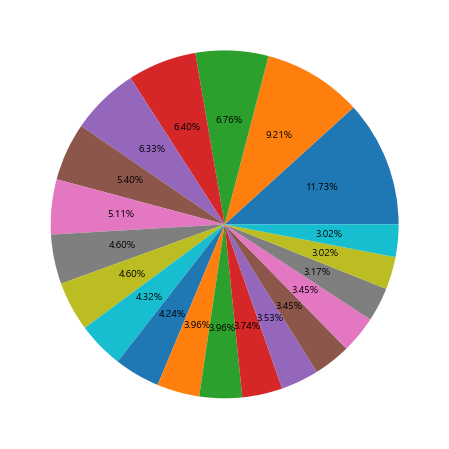

In [143]:
 # pie chart
fig = plt.figure(figsize=(8,8)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() # 프레임 생성
 
pie = ax.pie(name_list,
             labels=name_list.keys(),
             autopct=lambda p : '{:.2f}%'.format(p))
plt.savefig('pie chart.png')
plt.show()

### step 3. wordcloud

In [4]:
text_sum = ''

In [5]:
# 한 문장으로 합치기
for i in df['제목']:
    text_sum = text_sum + i
text_sum

'파워큐브 고정형 결제 후 취소는 언제?장기렌트 업체 추천 부탁드립니다..핸드폰무선거치대 usb 충전케이블 질문파워큐브 고정형 사용법 문의[기능질문] 블박 직결시 하루 주행거리 3키로정도 질문입니다고수님들ㅠㅜ결제 관련 상담이요이거 습기 찬거죠?Tpms 결함트렁크가 안닫혀요뒷좌석 이정도 흔들림은 원래있나요?집밥 궁금합니다[기능질문] 테슬라 모델3 시트는 머리 거치 부분 위로 못 올리나요?한쇼계기판 티맵 질문드려요~[계약질문] 보조금 관련 질문입니다.[오파질문] 저속구간 오토파일럿 주행시 오토홀드 걸리는 소리파워큐브 질문드립니다...[AS질문] 모3 19인치 타이어 이것도 가능할까요전 차옆에 없으면 계속 이런데 정상일까요?취등록세 셀프등록은 카드가 되고, 대행에 맡기면 카드가 안되는 이유가 뭔가요??이 아이콘은 어떤 기능인가요?모델3롱, 모델y 스탠 고민 여러분의 의견은??ㅋ[가격질문] 얼마전에 카드할부 ibk 2.5%에 글이 왜 많았던거죠??오토 트렁크프렁크[기능질문] 폰으로.풍량세기.조절질문네마설치 준비물 문의기존 차를 헤이딜러에서 판매하려고 하는데 차량 목록에 안나옵니다.블랙박스..키팝구매 관련급속 VS 완속 손실율?모델Y 길들이기 어떻게 해야되나요?오토프렁크 부품은 어디서 구입하실까요?뒷범퍼 센서가..지방세완납증명서[AS질문] 서비스 위치 신청[충전질문] 테린입니다. 이거 모바일충전 가능한가요???[기능질문] 회생제동시 브레이크등 점등삼성카드 결제시[오파질문] 오파 잘 아시는 선배님들 질문 있습니다삼성카드 캐쉬백궁금합니다[AS질문] 이게 뭘까요?[보조금질문] 선배님들 장애혜택 대표자 설정 문의드려요[기능질문] 후방카메라 녹색 세로줄 정상인가요?구매 가능한 AS 기간 연장 패키지 같은 것 있나요?카드결제일 궁금합니다!대시보드 눌림 증상[충전질문] g차저 어플 질문모델3 주문후 3분기안에 도착 안하면 취소 가능할까요?첫주행후 전비 관련 질문드려요붐박스 주행 사라지신분 없나요?[기능질문] SSD가 필요한 이유?[수퍼차저질문] 부산슈퍼차저 24시간 오픈인가요?블루

In [6]:
# 자음, 모음, 알파벳, 특수기호, 특수기호 제거
text_sub = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ|?!.,\^<>]+').sub('',text_sum)
text_sub

'파워큐브 고정형 결제 후 취소는 언제장기렌트 업체 추천 부탁드립니다핸드폰무선거치대 usb 충전케이블 질문파워큐브 고정형 사용법 문의[기능질문] 블박 직결시 하루 주행거리 3키로정도 질문입니다고수님들결제 관련 상담이요이거 습기 찬거죠Tpms 결함트렁크가 안닫혀요뒷좌석 이정도 흔들림은 원래있나요집밥 궁금합니다[기능질문] 테슬라 모델3 시트는 머리 거치 부분 위로 못 올리나요한쇼계기판 티맵 질문드려요~[계약질문] 보조금 관련 질문입니다[오파질문] 저속구간 오토파일럿 주행시 오토홀드 걸리는 소리파워큐브 질문드립니다[AS질문] 모3 19인치 타이어 이것도 가능할까요전 차옆에 없으면 계속 이런데 정상일까요취등록세 셀프등록은 카드가 되고 대행에 맡기면 카드가 안되는 이유가 뭔가요이 아이콘은 어떤 기능인가요모델3롱 모델y 스탠 고민 여러분의 의견은[가격질문] 얼마전에 카드할부 ibk 25%에 글이 왜 많았던거죠오토 트렁크프렁크[기능질문] 폰으로풍량세기조절질문네마설치 준비물 문의기존 차를 헤이딜러에서 판매하려고 하는데 차량 목록에 안나옵니다블랙박스키팝구매 관련급속 VS 완속 손실율모델Y 길들이기 어떻게 해야되나요오토프렁크 부품은 어디서 구입하실까요뒷범퍼 센서가지방세완납증명서[AS질문] 서비스 위치 신청[충전질문] 테린입니다 이거 모바일충전 가능한가요[기능질문] 회생제동시 브레이크등 점등삼성카드 결제시[오파질문] 오파 잘 아시는 선배님들 질문 있습니다삼성카드 캐쉬백궁금합니다[AS질문] 이게 뭘까요[보조금질문] 선배님들 장애혜택 대표자 설정 문의드려요[기능질문] 후방카메라 녹색 세로줄 정상인가요구매 가능한 AS 기간 연장 패키지 같은 것 있나요카드결제일 궁금합니다대시보드 눌림 증상[충전질문] g차저 어플 질문모델3 주문후 3분기안에 도착 안하면 취소 가능할까요첫주행후 전비 관련 질문드려요붐박스 주행 사라지신분 없나요[기능질문] SSD가 필요한 이유[수퍼차저질문] 부산슈퍼차저 24시간 오픈인가요블루투스 전화받는 방법[오파질문] 타 메이커 반자율 대비 어떤가요보조금문의모델3 리프레

In [7]:
tokens_ko = t.morphs(text_sub)
tokens_ko

['파워',
 '큐브',
 '고정',
 '형',
 '결제',
 '후',
 '취소',
 '는',
 '언',
 '제',
 '장기',
 '렌트',
 '업체',
 '추천',
 '부탁드립니다',
 '핸드폰',
 '무선거치대',
 'usb',
 '충전',
 '케이블',
 '질문',
 '파워',
 '큐브',
 '고정',
 '형',
 '사',
 '용법',
 '문의',
 '[',
 '기능',
 '질문',
 ']',
 '블박',
 '직결',
 '시',
 '하루',
 '주행',
 '거리',
 '3',
 '키',
 '로',
 '정도',
 '질문',
 '입니다',
 '고수',
 '님',
 '들',
 '결제',
 '관련',
 '상담',
 '이',
 '요',
 '이',
 '거',
 '습기',
 '찬거죠',
 'Tpms',
 '결함',
 '트렁크',
 '가',
 '안',
 '닫혀요',
 '뒷',
 '좌석',
 '이정',
 '도',
 '흔들림은',
 '원래',
 '있나요',
 '집밥',
 '궁금합니다',
 '[',
 '기능',
 '질문',
 ']',
 '테슬라',
 '모델',
 '3',
 '시트',
 '는',
 '머리',
 '거치',
 '부분',
 '위로',
 '못',
 '올리나요',
 '한쇼',
 '계기',
 '판',
 '티맵',
 '질문',
 '드려요',
 '~[',
 '계약',
 '질문',
 ']',
 '보조금',
 '관련',
 '질문',
 '입니다',
 '[',
 '오파',
 '질문',
 ']',
 '저',
 '속',
 '구간',
 '오토파일럿',
 '주',
 '행시',
 '오토',
 '홀드',
 '걸리는',
 '소리',
 '파워',
 '큐브',
 '질문',
 '드립니다',
 '[',
 'AS',
 '질문',
 ']',
 '모',
 '3',
 '19',
 '인치',
 '타이어',
 '이',
 '것',
 '도',
 '가능할까',
 '요전',
 '차옆',
 '에',
 '없으면',
 '계속',
 '이런데',
 '정상',
 '일까',
 '요취',
 '등록세',
 '셀프',
 '등록',
 '

In [8]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [9]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

161418
12370


In [61]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.','가',"!",'\r\n\r\n','\r\n','\n','\n ','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지',
                      'ㅋㅋ', 'ㅋㅋㅋ', 'ㅋ', '만', '아', '안,' '나', '사진', '난', '이모티콘',
                      '내', '그', '근데', '더', '안', '나', '임', '저', '면', '듯', '년', '하면', '에서',
                      '너', '서', '랑', '에서', '니깐', '적', '하고', '??', '~~', '~~~', '[', ']', '시',
                      '관련', '드립니다', '(', ')', '분', '하', '압니다', '혹시']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
data = ko.vocab().most_common(300)
data

[('모델', 3076),
 ('3', 2373),
 ('충전', 1840),
 ('테슬라', 1358),
 ('문의', 1300),
 ('보조금', 1278),
 ('계약', 1055),
 ('충전기', 989),
 ('차량', 796),
 ('차', 756),
 ('있나요', 657),
 ('카드', 626),
 ('어떻게', 609),
 ('입니다', 607),
 ('기능', 587),
 ('되나요', 558),
 ('구매', 552),
 ('인가요', 538),
 ('신분', 517),
 ('설치', 506),
 ('사용', 488),
 ('결제', 481),
 ('인도', 442),
 ('모', 427),
 ('롱', 411),
 ('하나요', 410),
 ('방법', 400),
 ('가격', 384),
 ('가능한가요', 384),
 ('Y', 381),
 ('출고', 378),
 ('있을까요', 376),
 ('예약', 375),
 ('아파트', 353),
 ('등록', 346),
 ('전기차', 332),
 ('모드', 327),
 ('전', 321),
 ('블랙박스', 318),
 ('배터리', 313),
 ('변경', 307),
 ('언제', 306),
 ('추천', 305),
 ('주행', 301),
 ('주문', 299),
 ('틴팅', 298),
 ('보험', 292),
 ('계신가요', 289),
 ('S', 282),
 ('드려요', 281),
 ('비', 280),
 ('와', 275),
 ('하이패스', 268),
 ('데모', 265),
 ('s', 258),
 ('커넥터', 249),
 ('업데이트', 248),
 ('될까', 241),
 ('y', 239),
 ('파워', 237),
 ('집밥', 233),
 ('신청', 229),
 ('주차', 229),
 ('큐브', 228),
 ('FSD', 228),
 ('월', 226),
 ('구입', 222),
 ('휠', 221),
 ('분들', 221),
 ('해야', 218)

In [17]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

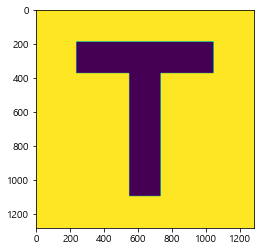

In [58]:
mask = np.array(Image.open('t.png'))
plt.imshow(mask)

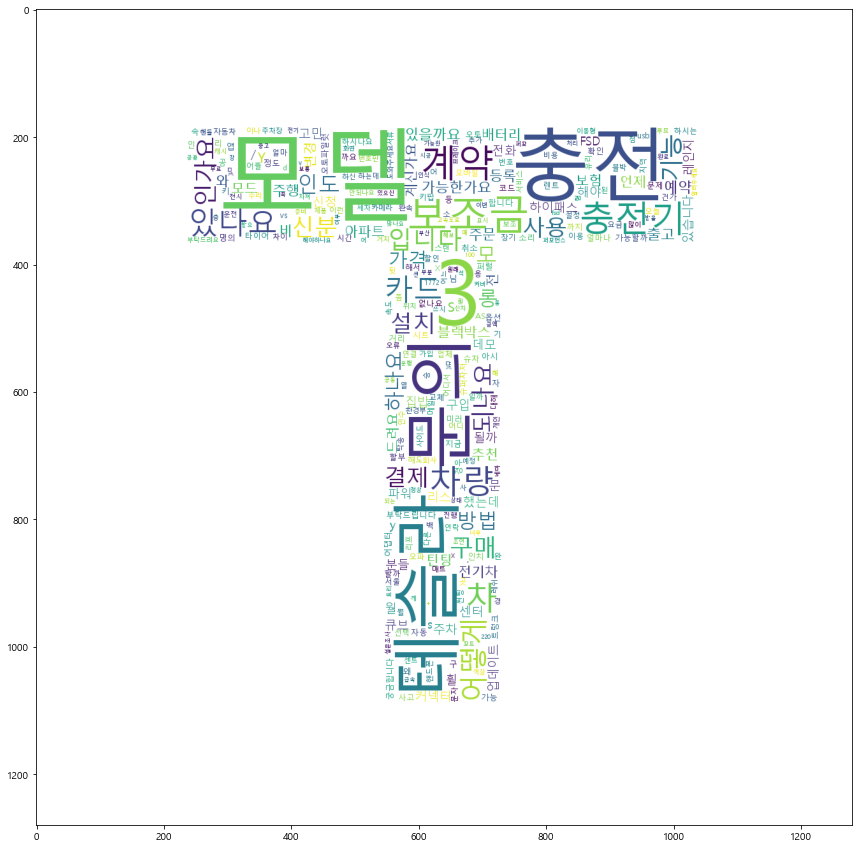

In [59]:
wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               background_color="white",
               #stopwords = stopwords,
               max_words=2000,
               mask=mask,
               max_font_size=300).generate_from_frequencies(dict(data))
plt.figure(figsize=(30,15))
#wc.words_
plt.imshow(wc)

In [ ]:
# 다음과 같이 파일로 저장
wordcloud.to_file('wordcloud.png')